In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

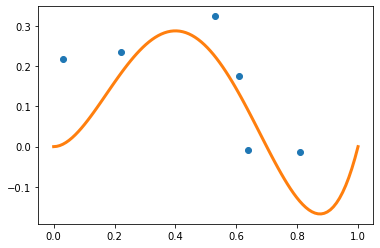

In [4]:
np.random.seed(662)

X_tr = np.array([0.03, 0.22, 0.53, 0.61, 0.64, 0.81]).reshape(-1, 1)
X_te = np.array([0.1, 0.3, 0.7]).reshape(-1, 1)

def r(x):
    return 10*x**4 - 17*x**3 + 7*x**2

y_tr = r(X_tr) + np.random.normal(0, 0.09, size=(6,1))
y_te = r(X_te) + np.random.normal(0, 0.09, size=(3,1))
t = np.linspace(0, 1, 100)

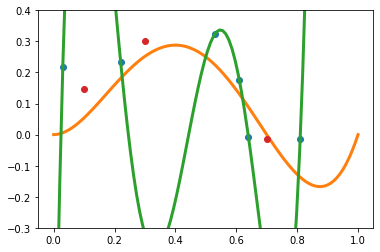

In [22]:
P = PolynomialFeatures(degree=5, include_bias=False)
M = LinearRegression()
M.fit(P.fit_transform(X_tr.reshape(-1, 1)), y_tr)
u = M.predict(P.fit_transform(t.reshape(-1,1)))

plt.plot(X_tr, y_tr, 'o')
plt.plot(t, r(t), lw=3)
plt.plot(t, u, lw=3)
plt.ylim(-0.3, 0.4)
plt.plot(X_te, y_te, 'o')

In [24]:
y_pr = M.predict(P.fit_transform(X_te))
test_error = np.mean(np.square(y_pr - y_te))

0.5923864725514182

In [26]:
training_error = np.mean(np.square(M.predict(P.fit_transform(X_tr)) - y_tr))
training_error

6.1225247771440445e-27

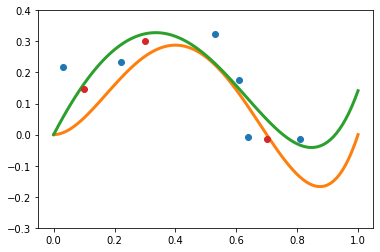

In [45]:
from sklearn.linear_model import Ridge

N = Ridge(alpha=0.0003612612612612612, fit_intercept=False)
N.fit(P.fit_transform(X_tr.reshape(-1, 1)), y_tr)
v = N.predict(P.fit_transform(t.reshape(-1,1)))

plt.plot(X_tr, y_tr, 'o')
plt.plot(t, r(t), lw=3)
plt.plot(t, v, lw=3)
plt.ylim(-0.3, 0.4)
plt.plot(X_te, y_te, 'o')

In [40]:
alphas = np.linspace(0.0001, 0.0006, 1000)
test_errors = np.zeros_like(alphas)
for i, alpha in enumerate(alphas):
    if i % 100 == 0:
        print(i)
    N = Ridge(alpha=alpha, fit_intercept=False)
    N.fit(P.fit_transform(X_tr.reshape(-1, 1)), y_tr)
    y_pr = N.predict(P.fit_transform(X_te))
    err = np.mean(np.square(y_pr - y_te))
    test_errors[i] = err

0
100
200
300
400
500
600
700
800
900


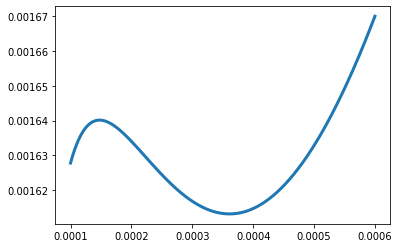

In [41]:
plt.plot(alphas, test_errors, lw=3)

28 2899
[ 2.2827108  -9.03754438 18.41949604 15.53336173 -1.2185342  -3.09837661
 -8.50632988  6.88125636 17.67455631  3.91384972]
[  1.33872437 -13.37163015  21.58059611  19.31426127 -44.74336668
  28.02157362  10.03537354  12.96206236  39.43259186   1.90441104]


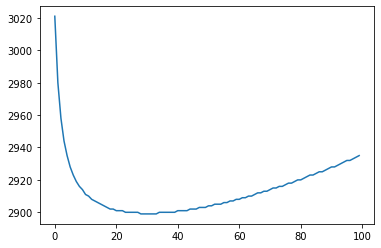

In [57]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

np.random.seed(4)
X, y = load_diabetes(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

S = StandardScaler()
S.fit(X_tr)

alphas = np.arange(0, 100)
losses = np.zeros_like(alphas)

for i, alpha in enumerate(alphas):
    M = LinearRegression()
    N = Ridge(alpha=alpha)
    N.fit(S.fit_transform(X_tr), y_tr)
    M.fit(S.fit_transform(X_tr), y_tr)
    y_pr = N.predict(S.fit_transform(X_te))
    losses[i] = mean_squared_error(y_pr, y_te)

plt.plot(alphas, losses)

alpha = alphas[losses.argmin()]
loss = min(losses)

print(alpha, loss)

print(N.coef_)
print(M.coef_)

1.46 2885.508605357909
[  0.          -7.72882633  21.21623689  16.80245852  -0.
  -0.         -10.03707547   0.          22.67542185   0.        ]


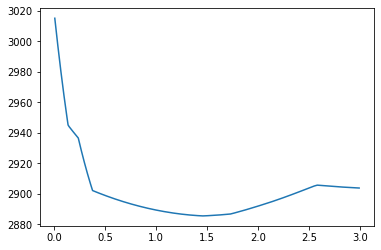

In [62]:
from sklearn.linear_model import Lasso

np.random.seed(4)
X, y = load_diabetes(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

S = StandardScaler()
S.fit(X_tr)

alphas = np.arange(0.01, 3, 0.01)
losses = np.zeros_like(alphas)

for i, alpha in enumerate(alphas):
    N = Lasso(alpha=alpha)
    N.fit(S.fit_transform(X_tr), y_tr)
    y_pr = N.predict(S.fit_transform(X_te))
    losses[i] = mean_squared_error(y_pr, y_te)

plt.plot(alphas, losses)

alpha = alphas[losses.argmin()]
loss = min(losses)

print(alpha, loss)

print(N.coef_)